# Predicting Cycling Lifetimes

### Import Modules

In [1]:
# Data Manipulation
import pandas as pd
import os
import numpy as np
from sklearn.metrics import auc
import math

# Data Visualization
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
# data file pathways
project_path=r'C:\Users\dmmkm\Documents\Projects\battery_management_systems'
a123_path=project_path+r'\project_data\A123'
a123_timeseries=project_path+r'\project_data\A123\timeseries_data'

In [4]:
# load dataframe from csv
data_df=pd.read_csv(project_path+'\\extracted_features\\extracted_features_cycle100.csv')
data_df.head()

,dataset,dq/dv_shift,dq_diff,max_temp_diff,ave_temp_cycle1,cycle_lifetime,2.0-2.1 V,2.1-2.2 V,2.2-2.3 V,2.3-2.4 V,...,dt_39_40 (C),dt_40_41 (C),dt_41_42 (C),dt_42_43 (C),dt_43_44 (C),dt_44_45 (C),dt_45_46 (C),dt_46_47 (C),dt_47_48 (C),dt_48_49 (C)
0,a123,-0.001527,-0.008349,-6.414988,31.875011,279.0,256.411497,2.559145,3.851198,5.863147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a123,-0.001094,-0.005910,-4.915979,31.668844,2158.0,249.156107,2.684140,4.039452,6.070350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a123,-0.000719,-0.005519,-6.163752,32.939408,786.0,260.328892,2.447698,3.434162,5.382598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a123,0.000180,0.001645,-6.523652,33.187719,288.0,248.257822,3.131025,4.263192,6.208157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a123,-0.000448,-0.003248,-6.944896,33.138162,717.0,253.051512,2.602178,3.627373,5.603975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Preprocessing

In [5]:
# create a123 dataframe
data='a123'
data_df=data_df[data_df['dataset']==data]
data_df.head()

,dataset,dq/dv_shift,dq_diff,max_temp_diff,ave_temp_cycle1,cycle_lifetime,2.0-2.1 V,2.1-2.2 V,2.2-2.3 V,2.3-2.4 V,...,dt_39_40 (C),dt_40_41 (C),dt_41_42 (C),dt_42_43 (C),dt_43_44 (C),dt_44_45 (C),dt_45_46 (C),dt_46_47 (C),dt_47_48 (C),dt_48_49 (C)
0,a123,-0.001527,-0.008349,-6.414988,31.875011,279.0,256.411497,2.559145,3.851198,5.863147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a123,-0.001094,-0.005910,-4.915979,31.668844,2158.0,249.156107,2.684140,4.039452,6.070350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a123,-0.000719,-0.005519,-6.163752,32.939408,786.0,260.328892,2.447698,3.434162,5.382598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a123,0.000180,0.001645,-6.523652,33.187719,288.0,248.257822,3.131025,4.263192,6.208157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a123,-0.000448,-0.003248,-6.944896,33.138162,717.0,253.051512,2.602178,3.627373,5.603975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Drop Identifying Columns

In [6]:
data_df.drop('dataset', axis=1, inplace=True)
data_df.head()

,dq/dv_shift,dq_diff,max_temp_diff,ave_temp_cycle1,cycle_lifetime,2.0-2.1 V,2.1-2.2 V,2.2-2.3 V,2.3-2.4 V,2.4-2.5 V,...,dt_39_40 (C),dt_40_41 (C),dt_41_42 (C),dt_42_43 (C),dt_43_44 (C),dt_44_45 (C),dt_45_46 (C),dt_46_47 (C),dt_47_48 (C),dt_48_49 (C)
0,-0.001527,-0.008349,-6.414988,31.875011,279.0,256.411497,2.559145,3.851198,5.863147,8.904745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.001094,-0.005910,-4.915979,31.668844,2158.0,249.156107,2.684140,4.039452,6.070350,9.006150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.000719,-0.005519,-6.163752,32.939408,786.0,260.328892,2.447698,3.434162,5.382598,8.503038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000180,0.001645,-6.523652,33.187719,288.0,248.257822,3.131025,4.263192,6.208157,9.421802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000448,-0.003248,-6.944896,33.138162,717.0,253.051512,2.602178,3.627373,5.603975,8.831058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Drop Rows with Missing Values

In [7]:
# get shape of dataframe before cleaning
print(data_df.shape)

(124, 279)


In [8]:
data_df=data_df.dropna()

In [9]:
# get shape of dataframe after cleaning
print(data_df.shape)

(124, 279)


##### Split into features and target

In [10]:
# Define target feature
target='cycle_lifetime'

In [11]:
# create target dataframe
y=data_df[target].to_numpy()

In [232]:
# feature lists
full_dsch_features=['dQ/dV_shift', 'diff_v_cap_area']
voltage_features=['3.1-3.2V_time', '3.4-3.5V_time']
temp_features=['diff_max_temp']

# model feature lists
full_model=full_dsch_features + voltage_features + temp_features
dsch_model=full_dsch_features
volt_temp_model=voltage_features + temp_features

# create data frame with desired features
x=data_df.drop(['cycle_time', 'cycle_lifetimes'], axis=1)
x=x[full_model]

In [233]:
x.head()

,dQ/dV_shift,diff_v_cap_area,3.1-3.2V_time,3.4-3.5V_time,diff_max_temp
0,0.001100,0.000316,0.115035,0.260998,0.204144
1,-0.001116,0.014601,0.109783,0.229397,-0.251766
2,-0.001634,0.032736,0.109327,0.204889,-0.636566
3,-0.000931,0.019042,0.109564,0.196298,-1.013516
4,-0.001225,0.037464,0.112635,0.176408,-0.829144


##### Data Normalization

In [12]:
# MinMaxScaler
scaler=MinMaxScaler()
x_norm=scaler.fit_transform(data_df)

In [234]:
# normalize data by row
x_norm=normalize(data_df)

##### Split into Training, Validation, and Testing Datasets

In [13]:
# The random seed
random_seed=42

# Set the random seed in tensor flow
tf.random.set_seed(random_seed)

In [14]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, train_size=0.8, random_state=random_seed, shuffle=True)

In [15]:
print(x_train.shape, y_train.shape)

(99, 279) (99,)


In [16]:
# split train dataset into train and validation (skip if using cross validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.75, random_state=random_seed, shuffle=True)

### Build Model

In [16]:
def create_model(learning_rate, alpha, nodes):
    # Build Model
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(nodes, activation='relu', kernel_regularizer=keras.regularizers.l2(alpha))),
    #model.add(tf.keras.layers.Dropout(0.2)),
    model.add(tf.keras.layers.Dense(nodes, activation='relu', kernel_regularizer=keras.regularizers.l2(alpha))),
    #model.add(tf.keras.layers.Dropout(0.2)),
    model.add(tf.keras.layers.Dense(nodes, activation='relu', kernel_regularizer=keras.regularizers.l2(alpha))),
    model.add(tf.keras.layers.Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(learning_rate))
    
    return model

In [40]:
cv=KFold(n_splits=10, random_state=random_seed, shuffle=True)
model_performances=[]
model_weights=[]

# create checkpoint
checkpoint_path=project_path+'\model_checkpoints\simpleMLP_checkpoints.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 verbose=1)

# train model
for train_index, val_index in cv.split(x_train):
    x_train1, x_val = x_train[train_index], x_train[val_index]
    y_train1, y_val = y_train[train_index], y_train[val_index]
    
    model=create_model(learning_rate=0.01, alpha=0.1, nodes=279)
    history=model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), callbacks=[cp_callback])
    model_performances.append(model.evaluate(x_val, y_val))
    model_weight=model.get_weights()
    model_weights.append(model_weight)
    model_dict=dict(zip(model_performances, model_weights))

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 793463.9375
Epoch 1: val_loss improved from inf to 476148.40625, saving model to C:\Users\dmmkm\Documents\Projects\battery_management_systems\model_checkpoints\simpleMLP_checkpoints.ckpt
INFO:tensorflow:Assets written to: C:\Users\dmmkm\Documents\Projects\battery_management_systems\model_checkpoints\simpleMLP_checkpoints.ckpt\assets
2/2 [==============================] - 1s 1s/step - loss: 766634.7500 - val_loss: 476148.4062
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 781916.9375
Epoch 2: val_loss improved from 476148.40625 to 97060.54688, saving model to C:\Users\dmmkm\Documents\Projects\battery_management_systems\model_checkpoints\simpleMLP_checkpoints.ckpt
INFO:tensorflow:Assets written to: C:\Users\dmmkm\Documents\Projects\battery_management_systems\model_checkpoints\simpleMLP_checkpoints.ckpt\assets
2/2 [==============================] - 1s 1s/step - loss: 615039.8125 - val_loss: 97060.5469
E

In [41]:
model_performances

[2809.525146484375,
 1026.4759521484375,
 826.18310546875,
 9681.712890625,
 2296.507568359375,
 1095.0999755859375,
 1945.1796875,
 602.3798828125,
 664.2754516601562,
 401.6213073730469]

In [42]:
mean_performance=np.mean(np.array(model_performances))
std_performance=np.std(np.array(model_performances))
best_performance=np.min(np.array(model_performances))

print('Mean:', mean_performance, 'Stdev:', std_performance, 'Best:', best_performance)


Mean: 2134.8960968017577 Stdev: 2626.9707281597925 Best: 401.6213073730469


Text(0.5, 0, 'MSE')

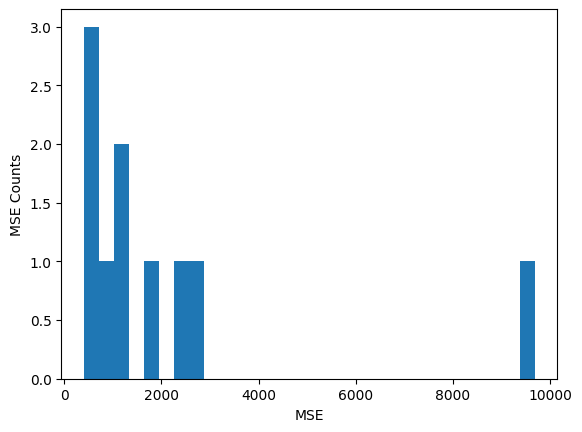

In [43]:
plt.hist(model_performances, bins=30)
plt.ylabel('MSE Counts')
plt.xlabel('MSE')

In [44]:
# Load Best Model from training
model = tf.keras.models.load_model(checkpoint_path)

### Evaluate Model

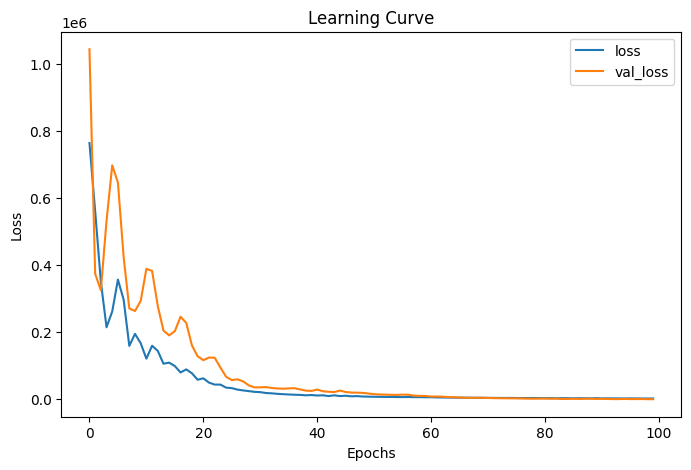

In [45]:
# Plot Learning Curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [27]:
# print Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 279)               78120     
                                                                 
 dense_21 (Dense)            (None, 279)               78120     
                                                                 
 dense_22 (Dense)            (None, 279)               78120     
                                                                 
 dense_23 (Dense)            (None, 1)                 280       
                                                                 
Total params: 234,640
Trainable params: 234,640
Non-trainable params: 0
_________________________________________________________________


### Test Model and Evaluate

In [46]:
# Make predictions using test set
y_pred=model.predict(x_test)
result_dict={'actual':y_test,
      'predicted':list(y_pred.T[0])}

1/1 [==============================] - 0s 55ms/step


In [59]:
result_df=pd.DataFrame.from_dict(result_dict)
result_df['residuals']=result_df['actual']-result_df['predicted']
result_df["% Error"] = (abs(result_df['actual'] - result_df['predicted'])/result_df['actual'])*100
result_df.head()

,actual,predicted,residuals,% Error
0,915.0,854.710388,60.289612,6.589029
1,169.0,330.146729,-161.146729,95.353094
2,597.0,630.367493,-33.367493,5.589195
3,491.0,520.142334,-29.142334,5.935302
4,519.0,488.217041,30.782959,5.931206


In [48]:
# R^2 score
r2=r2_score(result_dict['actual'], result_dict['predicted'])
print('R^2:',r2)

mse=mean_squared_error(result_dict['actual'], result_dict['predicted'])
print('MSE:', mse)

R^2: 0.37356944902651745
MSE: 82795.72683771781


In [27]:
# Fit line
x=list(range(int(min(y_test)), int(max(y_test))))

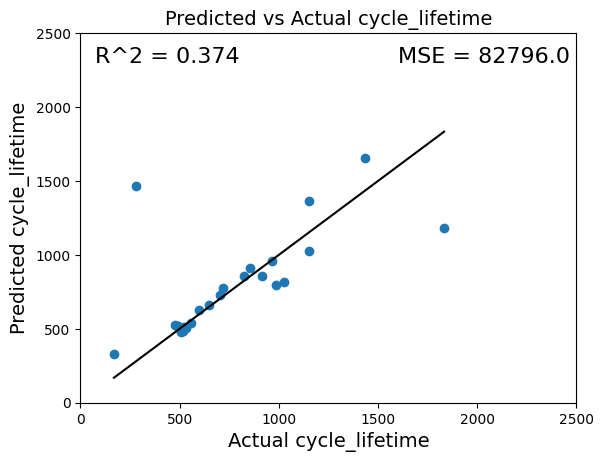

In [56]:
# Plot Actual and Predicted Results
plt.scatter(result_dict['actual'], result_dict['predicted'])
plt.plot(x, x, color='black')
plt.title('Predicted vs Actual '+target, fontsize=14)
plt.xlabel('Actual '+target, fontsize=14)
plt.ylabel('Predicted '+target, fontsize=14)

plt.text(75, 2300, 'R^2 = '+str(round(r2, 3)), fontsize=16)
plt.text(1600, 2300, 'MSE = '+str(round(mse, 0)), fontsize=16)
plt.ylim(0, 2500)
plt.xlim(0, 2500)

#plt.ylim(20000, 120000)
#plt.xlim(20000, 120000)
#plt.text(22000, 113000, 'R^2 = '+str(round(r2, 3)))

plt.show()

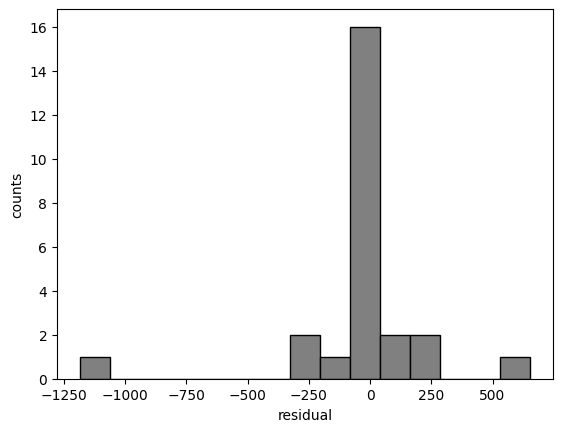

,residuals
count,25.000000
mean,-29.592886
std,292.118676
min,-1185.694092
25%,-49.861328
50%,-15.452026
75%,27.889496
max,655.034180


In [57]:
# Plot histogram of residuals
plt.hist(result_df['residuals'], bins=15, edgecolor='black', color='gray')
plt.ylabel('counts')
plt.xlabel('residual')
plt.show()

pd.DataFrame(result_df['residuals'].describe())

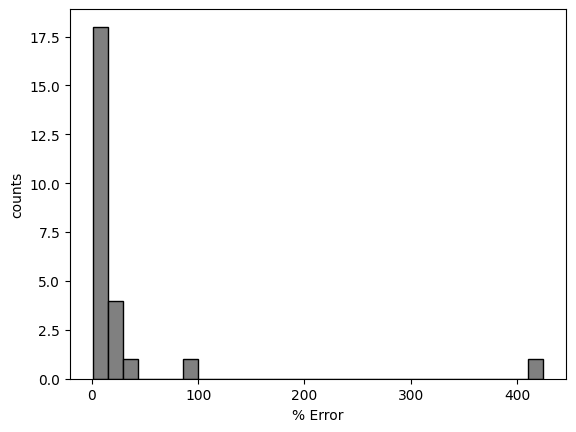

,% Error
count,25.000000
mean,28.921774
std,84.669060
min,0.547499
25%,4.029007
50%,6.336562
75%,15.413602
max,424.979961


In [64]:
# Plot histogram of % Error
plt.hist(result_df['% Error'], bins=30, edgecolor='black', color='gray')
plt.ylabel('counts')
plt.xlabel('% Error')
plt.show()

pd.DataFrame(result_df['% Error'].describe())

### Look at Training, Validation, Testing Datasets

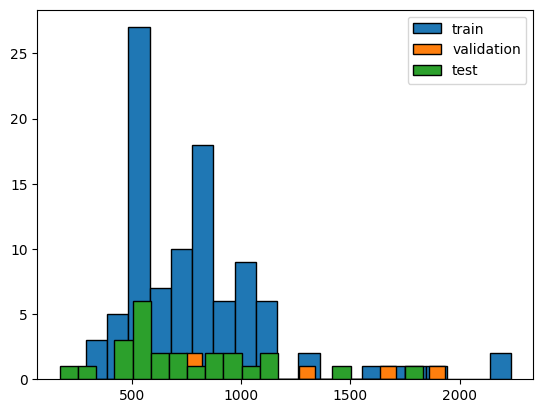

In [65]:
plt.hist(y_train, bins=20, label='train', edgecolor='black')
plt.hist(y_val, bins=20, label='validation', edgecolor='black')
plt.hist(y_test, bins=20, label='test', edgecolor='black')
plt.legend()
plt.show()